In [2]:
!pip3 install pymc3

     |████████████████████████████████| 908 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 34.5 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 231 kB 28.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 40.4 MB/s eta 0:00:01
     |████████████████████████████████| 668 kB 26.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.1 MB 29.0 MB/s eta 0:00:01
     |████████████████████████████████| 322 kB 28.3 MB/s eta 0:00:01
  Created wheel for theano: filename=Theano-1.0.4-py3-none-any.whl size=2667177 sha256=168761096f7d537cde0bdca32487c288a02a100d74aa1daae0c71d6cc00101ca
  Stored in directory: /home/jovyan/.cache/pip/wheels/22/6b/c8/952faef457482ca081255c4a887f44f11490d1175743559aad
Successfully built theano


In [3]:
from pymc3 import Categorical, sample, Model, traceplot
from matplotlib.pyplot import savefig
from numpy import array
from theano import shared

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [4]:
Nsamples = 10000

p_test_cov      = array([.05, .95])
p_doc_cov       = array([.05, .95])
p_tester_qual   = array([.2, .8])
p_assembl_qual  = array([.3, .7])
p_material_qual = array([.1, .9])
p_temperature   = array([.2, .8])
p_employee_qual = array([.35, .65])
p_oper_hrs      = array([.5, .5])
p_service_life  = array([.01, .99])

p_mtbf          = array([[.999, .001],
                         [.001, .999]])

p_mttf          = array([[.999, .001],
                         [.001, .999]])

p_defect_severity = array([[0., 1., 0., 0.],
                           [0., 1., 0., 0.],
                           [0., .2, .3, .5],
                           [0., 0., .5, .5],
                           [0., 0., 1., 0.],
                           [0., 0., .5, .5],
                           [0., 0., 0., 1.],
                           [0., 0., 0., 1.],
                           [1., 0., 0., 0.]])

p_device_failure  = array([[1., 0., 0.],
                           [.9, .1, 0.],
                           [0., .9, .1],
                           [0., 0., 1.]])

p_factory_test    = array([[
                            [[.2, .8],   [.15, .85]],
                            [[.19, .81], [.14, .86]]
                           ],
                           [
                            [[.16, .84], [.15, .85]],
                            [[.11, .89], [.1, .9]]
                           ]])

p_design_assembly = array([[
                            [[.15, .85],   [.1, .9]],
                            [[.12, .88], [.07, .93]]
                           ],
                           [
                            [[.1, .9], [.05, .95]],
                            [[.02, .98], [.01, .99]]
                           ]])

p_hsware_reliab   = array([[
                            [[.08, .92], [.07, .93]],
                            [[.06, .94], [.05, .95]]
                           ],
                           [
                            [[.04, .96], [.03, .97]],
                            [[.02, .98], [.01, .99]]
                           ]])

p_oper_cond       = array([[
                            [[.12, .88], [.11, .89]],
                            [[.1, .9],   [.08, .92]]
                           ],
                           [
                            [[.06, .94], [.04, .96]],
                            [[.02, .98], [0., 1.]]
                           ]])

p_device_status   = array([[
                            [[.08, .08, .08, .08, .08, .08, .08, .08, .936], [.07, .07, .07, .07, .07, .07, .07, .07, .944]],
                            [[.06, .06, .06, .06, .06, .06, .06, .06, .952], [.05, .05, .05, .05, .05, .05, .05, .05, .96]]
                           ],
                           [
                            [[.04, .04, .04, .04, .04, .04, .04, .04, .968], [.03, .03, .03, .03, .03, .03, .03, .03, .976]],
                            [[.02, .02, .02, .02, .02, .02, .02, .02, .984], [.01, .01, .01, .01, .01, .01, .01, .01, .992]]
                           ]])

In [5]:
with Model() as siprotec_model:
    test_cov             = Categorical('Test Coverage', p_test_cov)
    doc_cov              = Categorical('Doumentation Coverage', p_doc_cov)
    tester_qual          = Categorical('Tester Qualification', p_tester_qual)

    factory_test_sh      = shared(p_factory_test)
    factory_test_prob    = factory_test_sh[test_cov, doc_cov, tester_qual]
    factory_test         = Categorical('Factory Testing', factory_test_prob)

    assembl_qual         = Categorical('Assembler Qualification', p_assembl_qual)
    material_qual        = Categorical('Material quality', p_material_qual)

    design_assembly_sh   = shared(p_design_assembly)
    design_assembly_prob = design_assembly_sh[factory_test, assembl_qual, material_qual]
    design_assembly      = Categorical('Design & Assembly', design_assembly_prob)

    temperature          = Categorical('Temperature', p_temperature)

    mtbf_sh              = shared(p_mtbf)
    mtbf_prob            = mtbf_sh[temperature]
    mtbf                 = Categorical('Mean time between failures', mtbf_prob)

    mttf_sh              = shared(p_mttf)
    mttf_prob            = mttf_sh[temperature]
    mttf                 = Categorical('Mean time to failure', mttf_prob)

    hsware_reliab_sh     = shared(p_hsware_reliab)
    hsware_reliab_prob   = hsware_reliab_sh[design_assembly, mtbf, mttf]
    hsware_reliab        = Categorical('Hardware & Software Reliability', hsware_reliab_prob)

    employee_qual        = Categorical('Employee Qualification', p_employee_qual)
    oper_hrs             = Categorical('Operational Hours', p_oper_hrs) 

    oper_cond_sh         = shared(p_oper_cond)
    oper_cond_prob       = oper_cond_sh[temperature, employee_qual, oper_hrs]
    oper_cond            = Categorical('Operational Conditions', oper_cond_prob)

    service_life         = Categorical('Service Life', p_service_life)

    device_status_sh     = shared(p_device_status)
    device_status_prob   = device_status_sh[oper_cond, hsware_reliab, service_life]
    device_status        = Categorical('Device Status', device_status_prob)

    defect_severity_sh   = shared(p_defect_severity)
    defect_severity_prob = defect_severity_sh[device_status]
    defect_severity      = Categorical('Defect Severity', defect_severity_prob)

    device_failure_sh    = shared(p_device_failure)
    device_failure_prob  = device_failure_sh[defect_severity]
    device_failure       = Categorical('Device Failure', device_failure_prob)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [Test Coverage, Doumentation Coverage, Tester Qualification, Factory Testing, Assembler Qualification, Material quality, Design & Assembly, Temperature, Mean time between failures, Mean time to failure, Hardware & Software Reliability, Employee Qualification, Operational Hours, Operational Conditions, Service Life]
>CategoricalGibbsMetropolis: [Device Failure, Defect Severity, Device Status]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [02:12<00:00, 317.67draws/s]
/srv/conda/envs/notebook/lib/python3.6/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


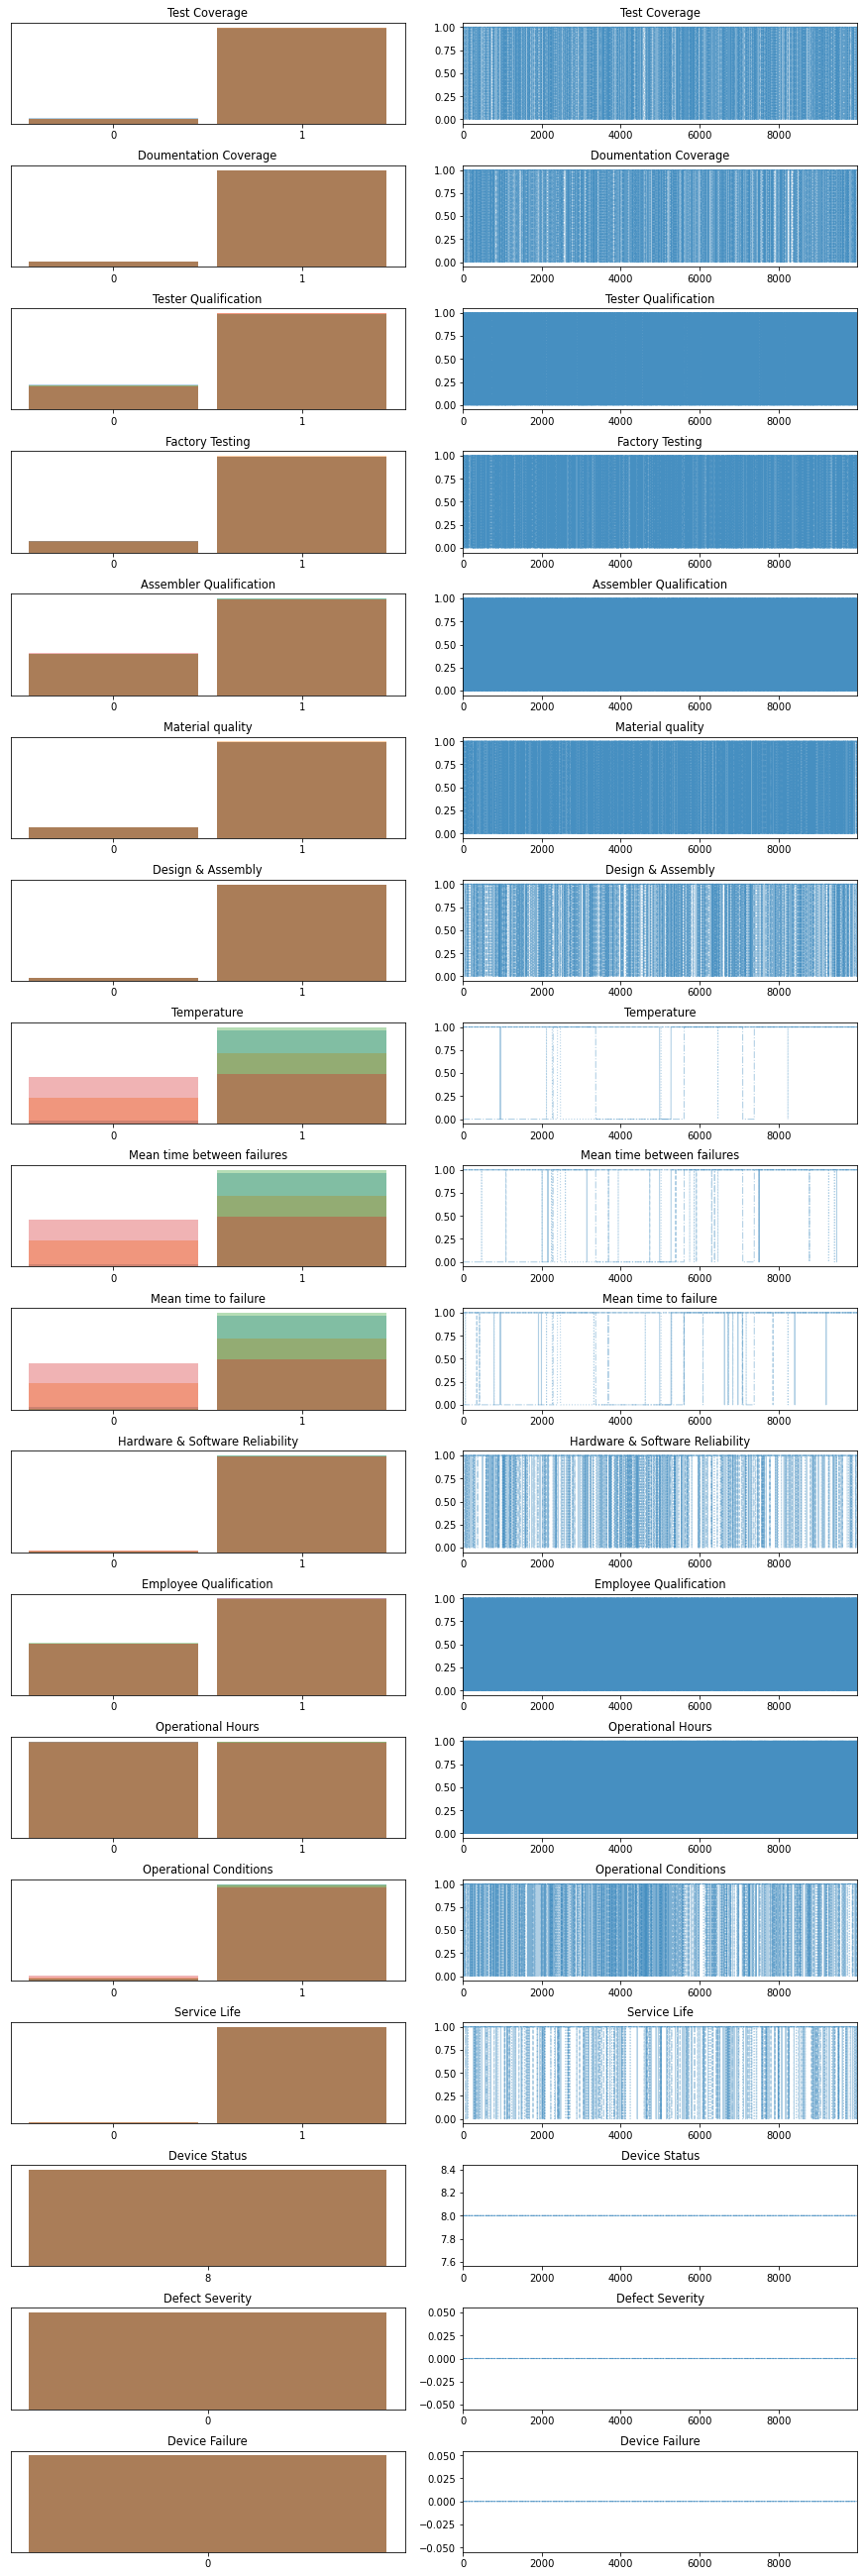

In [6]:
with siprotec_model:
    trace = sample(Nsamples)
    traceplot(trace)
    savefig('Iagafarov_siprotec_model.png')